## Library used:

Data preProcesess:
* pandas
* numpy
* matplotlib
* wordcloud
* regex
* contraction
* emoji
* nltk
* seaborn


Model Building
* scikit-learn

# 1. Data Preprocessing

In [1]:
import pandas as pd
import numpy as np

In [2]:
columns = ["Id","sentiment","airline","tweet_text"]
df = pd.read_csv("Sentiment_final_data.csv",names=columns,header=None)

In [3]:
df

,Id,sentiment,airline,tweet_text
0,5.700000e+17,positive,Virgin America,it was good flight
1,5.700000e+17,positive,Virgin America,@VirginAmerica plus you've added commercials t...
2,5.700000e+17,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...
3,5.700000e+17,negative,Virgin America,@VirginAmerica it's really aggressive to blast...
4,5.700000e+17,negative,Virgin America,@VirginAmerica and it's a really big bad thing...
...,...,...,...,...
14635,5.700000e+17,positive,American,@AmericanAir thank you we got on a different f...
14636,5.700000e+17,negative,American,@AmericanAir leaving over 20 minutes Late Flig...
14637,5.700000e+17,positive,American,happy journey
14638,5.700000e+17,negative,American,"@AmericanAir you have my money, you change my ..."


In [4]:
df.sample(10)

,Id,sentiment,airline,tweet_text
11894,5.700000e+17,neutral,American,"@AmericanAir DM the locator code, thanks."
4498,5.700000e+17,negative,Southwest,@SouthwestAir three hour flight to Orlando and...
1223,5.700000e+17,negative,United,@united 's new #flierfriendly is garbage. Just...
7843,5.690000e+17,negative,Delta,@JetBlue the first place but I really didn't n...
13193,5.700000e+17,negative,American,@AmericanAir literally just stopped allowing p...
4177,5.680000e+17,neutral,United,@united can you send me another confirmation e...
3892,5.680000e+17,neutral,United,@united @annricord January 15th.
12204,5.700000e+17,negative,American,"@AmericanAir 1-the lavatory freezes, 2- proble..."
8519,5.680000e+17,neutral,Delta,@JetBlue he's sch for 530 tmw on AA. would lov...
13273,5.700000e+17,neutral,American,@AmericanAir fl 249 to DFW is leaving Newark o...


In [5]:
print(f"Number of tweets {len(df)}")

Number of tweets 14640


In [6]:
tweet_id = 4879
tweet = df.iloc[tweet_id]

print(f"Tweet: {tweet['tweet_text']}")
print(f"Tweet Sentiment: {tweet['sentiment']}")

Tweet: @southwestair on flight 3130 and I paid $8 for wifi that can't load a website functionally except for your own live streaming. Unacceptable.
Tweet Sentiment: negative


### 1.1 Dropping Neutrals

In [7]:
df.drop(df.loc[df['sentiment']=="neutral"].index, inplace=True)

In [8]:
import matplotlib.pyplot as plt

In [9]:
# !pip install wordcloud

In [10]:
from wordcloud import WordCloud

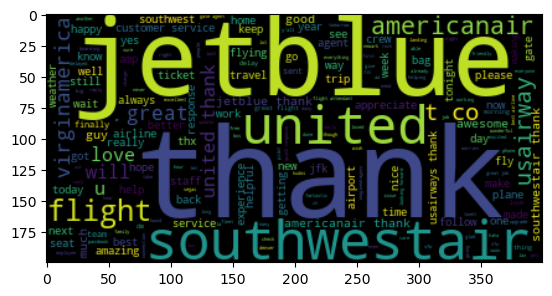

In [11]:
pos_tweets = df[df['sentiment']=='positive']
txt = " ".join(tweet.lower() for tweet in pos_tweets["tweet_text"])
wordcloud = WordCloud().generate(txt)
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

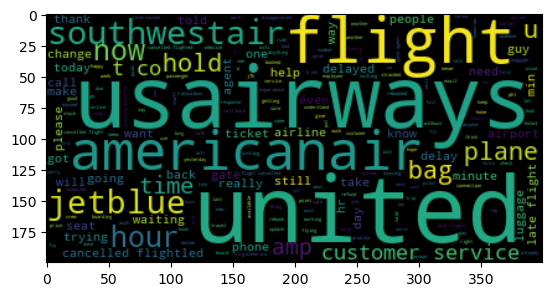

In [12]:
neg_tweets = df[df['sentiment']=='negative']
txt = " ".join(tweet.lower() for tweet in neg_tweets["tweet_text"])
wordcloud = WordCloud().generate(txt)
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

In [13]:
 !pip install emoji
 !pip install contractions

In [14]:
import re
import emoji
import contractions
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mridu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mridu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### 1.2 Preprocessing

In [15]:
## Twitter Features

def replace_retweet(tweet, default_replace=""):
  tweet = re.sub('RT\s+', default_replace, tweet)
  return tweet

def replace_user(tweet, default_replace="twitteruser"):
  tweet = re.sub('\B@\w+', default_replace, tweet)
  return tweet

def demojize(tweet):
  tweet = emoji.demojize(tweet)
  return tweet

def replace_url(tweet, default_replace=""):
  tweet = re.sub('(http|https):\/\/\S+', default_replace, tweet)
  return tweet

def replace_hashtag(tweet, default_replace=""):
  tweet = re.sub('#+', default_replace, tweet)
  return tweet

In [16]:
## Word Features

def to_lowercase(tweet):
  tweet = tweet.lower()
  return tweet

def word_repetition(tweet):
  tweet = re.sub(r'(.)\1+', r'\1\1', tweet)
  return tweet

def punct_repetition(tweet, default_replace=""):
  tweet = re.sub(r'[\?\.\!]+(?=[\?\.\!])', default_replace, tweet)
  return tweet

def fix_contractions(tweet):
  tweet = contractions.fix(tweet)
  return tweet

In [17]:
## Tokenization & Stemming

def custom_tokenize(tweet,
                    keep_punct = False,
                    keep_alnum = False,
                    keep_stop = False):
  
  token_list = word_tokenize(tweet)

  if not keep_punct:
    token_list = [token for token in token_list
                  if token not in string.punctuation]

  if not keep_alnum:
    token_list = [token for token in token_list if token.isalpha()]
  
  if not keep_stop:
    stop_words = set(stopwords.words('english'))
    stop_words.discard('not')
    token_list = [token for token in token_list if not token in stop_words]

  return token_list



def stem_tokens(tokens, stemmer):
  token_list = []
  for token in tokens:
    token_list.append(stemmer.stem(token))
  return token_list

# def lemmatize_tokens(tokens, word_type, lemmatizer):
#   token_list = []
#   for token in tokens:
#     token_list.append(lemmatizer.lemmatize(token, word_type[token]))
#   return token_list

In [18]:
def process_tweet(tweet, verbose=False):
  if verbose: print("Initial tweet: {}".format(tweet))

  ## Twitter Features
  tweet = replace_retweet(tweet) # replace retweet
  tweet = replace_user(tweet, "") # replace user tag
  tweet = replace_url(tweet) # replace url
  tweet = replace_hashtag(tweet) # replace hashtag
  if verbose: print("Post Twitter processing tweet: {}".format(tweet))

  ## Word Features
  tweet = to_lowercase(tweet) # lower case
  tweet = fix_contractions(tweet) # replace contractions
  tweet = punct_repetition(tweet) # replace punctuation repetition
  tweet = word_repetition(tweet) # replace word repetition
  tweet = demojize(tweet) # replace emojis
  if verbose: print("Post Word processing tweet: {}".format(tweet))

  ## Tokenization & Stemming
  tokens = custom_tokenize(tweet, keep_alnum=False, keep_stop=False) # tokenize
  stemmer = SnowballStemmer("english") # define stemmer
  stem = stem_tokens(tokens, stemmer) # stem tokens

  return stem

In [19]:
import random

In [20]:
for i in range(5):
  tweet_id = random.randint(0,len(df))
  tweet = df.iloc[tweet_id]["tweet_text"]
  print(process_tweet(tweet, verbose=True))
  print("\n")

Initial tweet: @united in ORD hotel issued to my 4yr old. Tickets needed fixing again another hour and 5 agents l8r nightmare still not over
Post Twitter processing tweet:  in ORD hotel issued to my 4yr old. Tickets needed fixing again another hour and 5 agents l8r nightmare still not over
Post Word processing tweet:  in ord hotel issued to my 4yr old. tickets needed fixing again another hour and 5 agents l8r nightmare still not over
['ord', 'hotel', 'issu', 'old', 'ticket', 'need', 'fix', 'anoth', 'hour', 'agent', 'nightmar', 'still', 'not']


Initial tweet: @united I am furious.  You're firm is a disgrace. Despite all our efforts you did zero to protect our daughter. All alone at night # United
Post Twitter processing tweet:  I am furious.  You're firm is a disgrace. Despite all our efforts you did zero to protect our daughter. All alone at night  United
Post Word processing tweet:  i am furious.  you are firm is a disgrace. despite all our efforts you did zero to protect our daughte

In [21]:
df["tokens"] = df["tweet_text"].apply(process_tweet)
df["tweet_sentiment"] = df["sentiment"].apply(lambda i: 1
                                              if i == "positive" else 0)

In [22]:
df

,Id,sentiment,airline,tweet_text,tokens,tweet_sentiment
0,5.700000e+17,positive,Virgin America,it was good flight,"[good, flight]",1
1,5.700000e+17,positive,Virgin America,@VirginAmerica plus you've added commercials t...,"[plus, ad, commerci, experi, tacki]",1
3,5.700000e+17,negative,Virgin America,@VirginAmerica it's really aggressive to blast...,"[realli, aggress, blast, obnoxi, entertain, gu...",0
4,5.700000e+17,negative,Virgin America,@VirginAmerica and it's a really big bad thing...,"[realli, big, bad, thing]",0
5,5.700000e+17,negative,Virgin America,@VirginAmerica seriously would pay $30 a fligh...,"[serious, would, pay, flight, seat, not, play,...",0
...,...,...,...,...,...,...
14634,5.700000e+17,negative,American,@AmericanAir right on cue with the delays👌,"[right, cue, delay]",0
14635,5.700000e+17,positive,American,@AmericanAir thank you we got on a different f...,"[thank, got, differ, flight, chicago]",1
14636,5.700000e+17,negative,American,@AmericanAir leaving over 20 minutes Late Flig...,"[leav, minut, late, flight, warn, communic, mi...",0
14637,5.700000e+17,positive,American,happy journey,"[happi, journey]",1


In [23]:
X = df["tokens"].tolist()
y = df["tweet_sentiment"].tolist()

In [24]:
print(X)
print(y)

[['good', 'flight'], ['plus', 'ad', 'commerci', 'experi', 'tacki'], ['realli', 'aggress', 'blast', 'obnoxi', 'entertain', 'guest', 'face', 'amp', 'littl', 'recours'], ['realli', 'big', 'bad', 'thing'], ['serious', 'would', 'pay', 'flight', 'seat', 'not', 'play', 'realli', 'bad', 'thing', 'fli', 'va'], ['yes', 'near', 'everi', 'time', 'fli', 'vx', 'ear', 'worm', 'not', 'go', 'away'], ['happi', 'flight'], ['well'], ['amaz', 'arriv', 'hour', 'earli', 'good'], ['good', 'experi'], ['lt', 'pretti', 'graphic', 'much', 'better', 'minim', 'iconographi'], ['great', 'deal', 'alreadi', 'think', 'trip', 'amp', 'not', 'even', 'gone', 'trip', 'yet', 'p'], ['fli', 'fabul', 'seduct', 'sky', 'take', 'stress', 'away', 'travel'], ['thank'], ['schedul', 'still', 'mia'], ['excit', 'first', 'cross', 'countri', 'flight', 'lax', 'mco', 'heard', 'noth', 'great', 'thing', 'virgin', 'america'], ['flew', 'nyc', 'sfo', 'last', 'week', 'could', 'not', 'fulli', 'sit', 'seat', 'due', 'two', 'larg', 'gentleman', 'eithe

In [25]:
corpus = [["i", "love", "nlp"],
          ["i", "miss", "you"],
           ["i", "love", "you"],
           ["you", "are", "happy", "to", "learn"],
           ["i", "lost", "my", "computer"],
           ["i", "am", "so", "sad"]]

sentiment = [1, 0, 1, 1, 0, 0]

### 1.3 Getting Word Frequency

In [26]:
def build_freqs(tweet_list, sentiment_list):
  freqs = {}
  for tweet, sentiment in zip(tweet_list, sentiment_list):
    for word in tweet:
      pair = (word, sentiment)
      if pair in freqs:
        freqs[pair] += 1
      else:
        freqs[pair] = 1
  return freqs

In [27]:
freqs = build_freqs(corpus, sentiment)
print(freqs)

{('i', 1): 2, ('love', 1): 2, ('nlp', 1): 1, ('i', 0): 3, ('miss', 0): 1, ('you', 0): 1, ('you', 1): 2, ('are', 1): 1, ('happy', 1): 1, ('to', 1): 1, ('learn', 1): 1, ('lost', 0): 1, ('my', 0): 1, ('computer', 0): 1, ('am', 0): 1, ('so', 0): 1, ('sad', 0): 1}


In [28]:
freqs_all = build_freqs(X, y)

print("Frequency of word 'love' in + tweets: {}".format(freqs_all[("love", 1)]))
print("Frequency of word 'love' in - tweets: {}".format(freqs_all[("love", 0)]))

Frequency of word 'love' in + tweets: 186
Frequency of word 'love' in - tweets: 85


In [29]:
def tweet_to_freq(tweet, freqs):
  x = np.zeros((2,))
  for word in tweet:
    if (word, 1) in freqs:
      x[0] += freqs[(word, 1)]
    if (word, 0) in freqs:
      x[1] += freqs[(word, 0)]
  return x

In [30]:
print(tweet_to_freq(["i", "love", "nlp"], freqs))

[5. 3.]


In [31]:
print(tweet_to_freq(["i", "love", "nlp"], freqs_all))

[186.  85.]


# 2. Feature Selection

### 2.1 Count Vectorizer

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

In [33]:
corpus = [["love", "nlp"],
          ["miss", "you"],
          ["hate", "hate", "hate", "love"],
          ["happy", "love", "hate"],
          ["i", "lost", "my", "computer"],
          ["i", "am", "so", "sad"]]

In [34]:
def fit_cv(tweet_corpus):
  cv_vect = CountVectorizer(tokenizer=lambda x: x,
                            preprocessor=lambda x: x)
  cv_vect.fit(tweet_corpus)
  return cv_vect

In [35]:
cv_vect = fit_cv(corpus)

C:\Users\mridu\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [36]:
ft = cv_vect.get_feature_names_out()

In [37]:
print("There are {} features in this corpus".format(len(ft)))
print(ft)

There are 13 features in this corpus
['am' 'computer' 'happy' 'hate' 'i' 'lost' 'love' 'miss' 'my' 'nlp' 'sad'
 'so' 'you']


In [38]:
cv_mtx = cv_vect.transform(corpus)

In [39]:
print("Matrix shape is: {}".format(cv_mtx.shape))

Matrix shape is: (6, 13)


In [40]:
cv_mtx.toarray()

array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0]], dtype=int64)

In [41]:
new_tweet = [["lost", "lost", "miss", "miss"]]
cv_vect.transform(new_tweet).toarray()

array([[0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0]], dtype=int64)

In [42]:
unknown_tweet = [["John", "drives", "cars"]]
cv_vect.transform(unknown_tweet).toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

### 2.2 Term Frequency-inverse Document Frequency Vectorizer

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [44]:
corpus = [["love", "nlp"],
          ["miss", "you"],
          ["hate", "hate", "hate", "love"],
          ["happy", "love", "hate"],
          ["i", "lost", "my", "computer"],
          ["i", "am", "so", "sad"]]

In [45]:
def fit_tfidf(tweet_corpus):
  tf_vect = TfidfVectorizer(preprocessor=lambda x: x,
                            tokenizer=lambda x: x)
  tf_vect.fit(tweet_corpus)
  return tf_vect

In [46]:
tf_vect = fit_tfidf(corpus)
tf_mtx = tf_vect.transform(corpus)

In [47]:
print("Matrix shape is: {}".format(tf_mtx.shape))

Matrix shape is: (6, 13)


In [48]:
ft = tf_vect.get_feature_names_out()

In [49]:
print("There are {} features in this corpus".format(len(ft)))
print(ft)

There are 13 features in this corpus
['am' 'computer' 'happy' 'hate' 'i' 'lost' 'love' 'miss' 'my' 'nlp' 'sad'
 'so' 'you']


In [50]:
tf_mtx.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.56921261, 0.        , 0.        , 0.82219037,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.70710678, 0.        , 0.        ,
        0.        , 0.        , 0.70710678],
       [0.        , 0.        , 0.        , 0.96260755, 0.        ,
        0.        , 0.27089981, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.68172171, 0.55902156, 0.        ,
        0.        , 0.47196441, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.52182349, 0.        , 0.        , 0.42790272,
        0.52182349, 0.        , 0.        , 0.52182349, 0.        ,
        0.        , 0.        , 0.        ],
       [0.52182349, 0.        , 0.        , 0.        , 0.42790272,
        0.        , 0.     

In [51]:
new_tweet = [["I", "hate", "nlp"]]
tf_vect.transform(new_tweet).toarray()

array([[0.        , 0.        , 0.        , 0.6340862 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.77326237,
        0.        , 0.        , 0.        ]])

In [52]:
import seaborn as sn

def plot_confusion(cm):
  plt.figure(figsize = (5,5))
  sn.heatmap(cm, annot=True, cmap="Blues", fmt='.0f')
  plt.xlabel("Prediction")
  plt.ylabel("True value")
  plt.title("Confusion Matrix")
  return sn

In [53]:
# print(X)
# print(y)

# 3. Model Building

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0,
                                                    train_size=0.80)

In [56]:
print("Size of X_train: {}".format(len(X_train)))
print("Size of y_train: {}".format(len(y_train)))
print("\n")
print("Size of X_test: {}".format(len(X_test)))
print("Size of y_test: {}".format(len(y_test)))
print("\n")
print("Train proportion: {:.0%}".format(len(X_train)/
                                        (len(X_train)+len(X_test))))

Size of X_train: 9286
Size of y_train: 9286


Size of X_test: 2322
Size of y_test: 2322


Train proportion: 80%


In [57]:
id = random.randint(0,len(X_train))
print("Train tweet: {}".format(X_train[id]))
print("Sentiment: {}".format(y_train[id]))

Train tweet: ['arriv', 'airport', 'told', 'ticket', 'refund', 'name', 'fraud', 'alert']
Sentiment: 0


In [58]:
#from sklearn.linear_model import LogisticRegression

In [59]:
from sklearn.svm import SVC

In [60]:
def fit_lr(X_train, y_train):
  model = SVC()
  model.fit(X_train, y_train)
  return model

In [61]:
freqs = build_freqs(X_train, y_train)
X_train_pn = [tweet_to_freq(tweet, freqs) for tweet in X_train]
X_test_pn = [tweet_to_freq(tweet, freqs) for tweet in X_test]

In [62]:
model_lr_pn = fit_lr(X_train_pn, y_train)

In [63]:
cv = fit_cv(X_train)
X_train_cv = cv.transform(X_train)
X_test_cv = cv.transform(X_test)

C:\Users\mridu\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [64]:
model_lr_cv = fit_lr(X_train_cv, y_train)

In [65]:
tf = fit_tfidf(X_train)
X_train_tf = tf.transform(X_train)
X_test_tf = tf.transform(X_test)

C:\Users\mridu\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [66]:
model_lr_tf = fit_lr(X_train_tf, y_train)

In [67]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [68]:
y_pred_lr_pn = model_lr_pn.predict(X_test_pn)
print("LR Model Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred_lr_pn)))

LR Model Accuracy: 84.63%


<Axes: title={'center': 'Confusion Matrix'}>

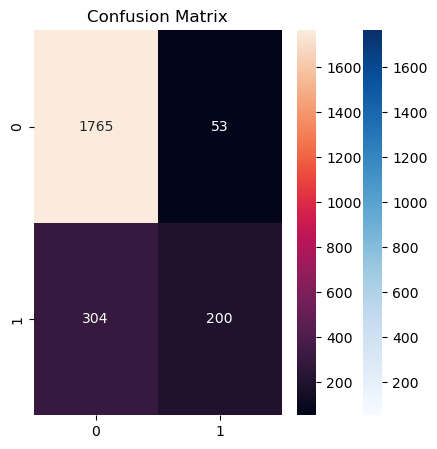

In [69]:
plot_confusion(confusion_matrix(y_test, y_pred_lr_pn))
sn.heatmap(confusion_matrix(y_test,y_pred_lr_pn),annot = True,fmt = "d")

In [70]:
y_pred_lr_cv = model_lr_cv.predict(X_test_cv)
print("LR Model Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred_lr_cv)))

LR Model Accuracy: 91.13%


<Axes: title={'center': 'Confusion Matrix'}>

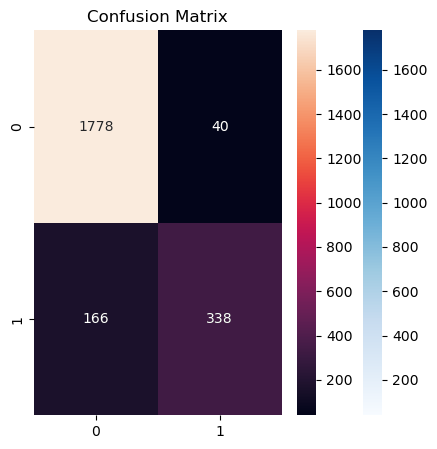

In [71]:
plot_confusion(confusion_matrix(y_test, y_pred_lr_cv))
sn.heatmap(confusion_matrix(y_test,y_pred_lr_cv),annot = True,fmt = "d")

In [72]:
y_pred_lr_tf = model_lr_tf.predict(X_test_tf)
print("LR Model Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred_lr_tf)))

LR Model Accuracy: 91.65%


<Axes: title={'center': 'Confusion Matrix'}>

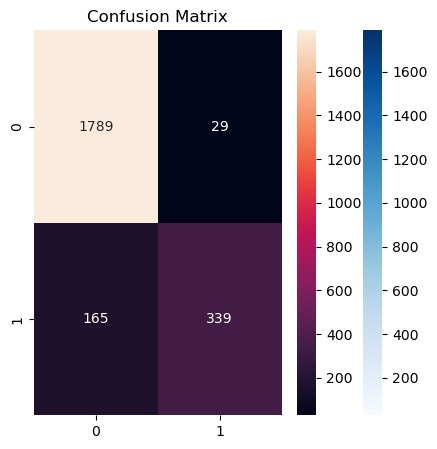

In [73]:
plot_confusion(confusion_matrix(y_test, y_pred_lr_tf))
sn.heatmap(confusion_matrix(y_test,y_pred_lr_tf),annot = True,fmt = "d")

# 4. Pipeline

In [74]:
def predict_tweet(tweet):
  processed_tweet = process_tweet(tweet)
  transformed_tweet = tf.transform([processed_tweet])
  prediction = model_lr_tf.predict(transformed_tweet)

  if prediction == 1:
    return "Prediction is positive sentiment"
  else:
    return "Prediction is negative sentiment"

In [75]:
your_tweet = """ time management was good """

In [76]:
predict_tweet(your_tweet)

'Prediction is positive sentiment'